In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

data  = pd.read_csv('Data_sets/Ads_CTR_Optimisation.csv')

data

import random
N = 10000
d = 10
ads_selected = []
total_rewards = 0
sum_rewards = [0] * d
no_of_selections = [0] * d

for n in range(N):
    ad=0
    max_upper_bound=0
    for i in range(0,10):
        if(no_of_selections[i]>0):
            average_reward = sum_rewards[i]/no_of_selections[i]
            delta_i = math.sqrt(3/2*math.log(n+1)/no_of_selections[i])
            upper_bound = average_reward+delta_i
        else:
            upper_bound = 1e400
            
        if(upper_bound>max_upper_bound):
            ad=i
            max_upper_bound=upper_bound
            
    ads_selected.append(ad)
    reward = data.values[n,ad]
    sum_rewards[ad] = sum_rewards[ad] + reward
    total_rewards = total_rewards + reward
    no_of_selections[ad] = no_of_selections[ad]+1

print(sum_rewards)
print(total_rewards)
print(no_of_selections)
print(sum(no_of_selections))


[120, 47, 7, 38, 1675, 1, 27, 236, 20, 7]
2178
[705, 387, 186, 345, 6323, 150, 292, 1170, 256, 186]
10000


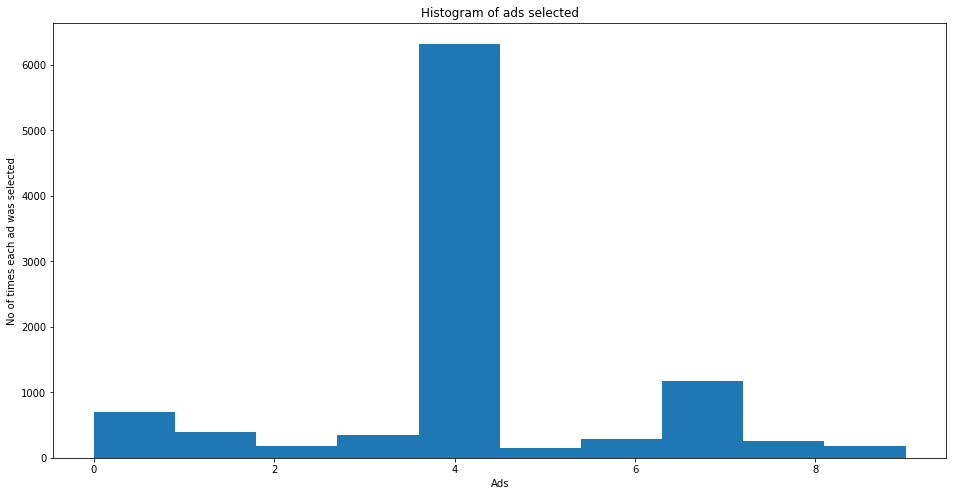

In [5]:
plt.figure(figsize=(16,8))
plt.hist(ads_selected)
plt.title('Histogram of ads selected')
plt.xlabel('Ads')
plt.ylabel('No of times each ad was selected');